Training set shape: (50000, 32, 32, 3)
Testing set shape: (10000, 32, 32, 3)


C:\Users\NAYANA\AppData\Local\Temp\ipykernel_9616\1087195692.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


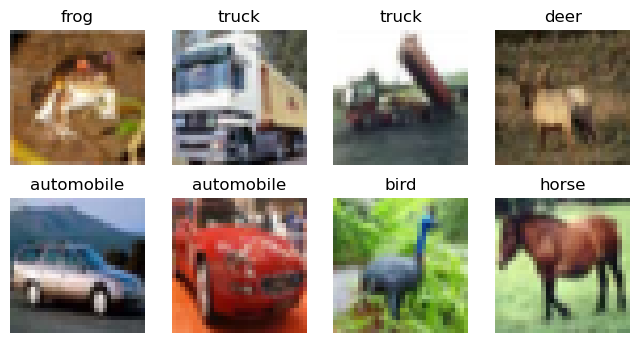

In [2]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Step 2: Load CIFAR-10 dataset
# It comes pre-split into training (50,000 images) and testing (10,000 images)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

# Step 3: Normalize pixel values
# Original pixel values are 0-255 → we scale them to 0-1 for neural networks
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Step 4: Visualize a few images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.show()

In [3]:
# Step 2.1: Import libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Step 2.2: Define Autoencoder Architecture
input_img = Input(shape=(32, 32, 3))  # CIFAR-10 images are 32x32 RGB

# Encoder (Compression Part)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder (Reconstruction Part)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Step 2.3: Build Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Step 2.4: Train Model
history = autoencoder.fit(
    x_train, x_train,   # Input and output are the same for autoencoder
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - loss: 0.5853 - val_loss: 0.5690
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - loss: 0.5655 - val_loss: 0.5644
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - loss: 0.5629 - val_loss: 0.5628
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - loss: 0.5616 - val_loss: 0.5618
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - loss: 0.5607 - val_loss: 0.5612
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - loss: 0.5600 - val_loss: 0.5604
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - loss: 0.5596 - val_loss: 0.5599
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 187s 478ms/step - loss: 0.5591 - val_loss: 0.5600
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - loss: 0.5588 - val_loss: 0.5593
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - loss: 0.5586 - val_loss: 0.5595


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step


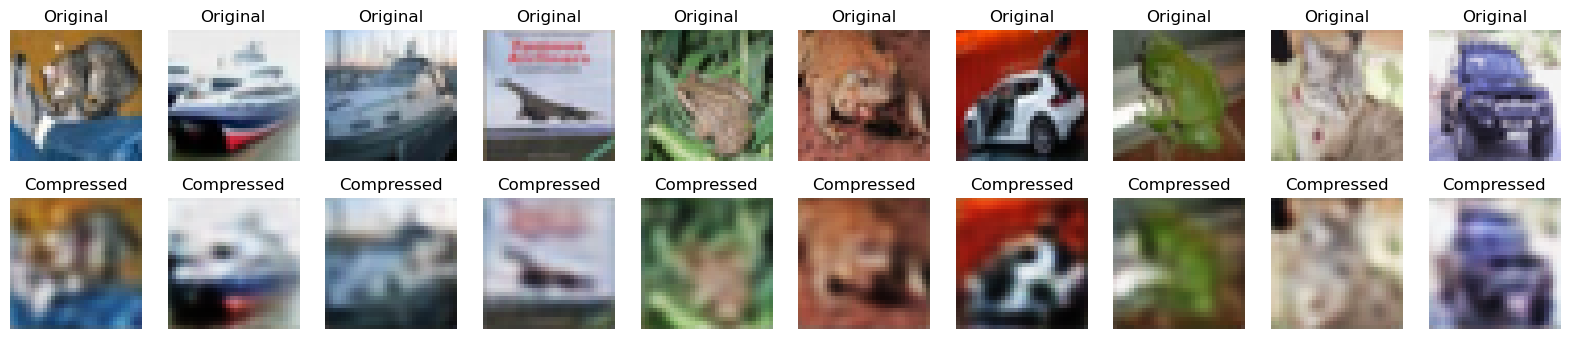

In [4]:
# Encode and Decode test images
decoded_imgs = autoencoder.predict(x_test[:10])

# Show results
plt.figure(figsize=(20,4))
for i in range(10):
    # Original
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, 10, i+1+10)
    plt.imshow(decoded_imgs[i])
    plt.title("Compressed")
    plt.axis('off')
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN model for classification
classifier = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

classifier.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train CNN
history = classifier.fit(x_train, y_train, epochs=10, 
                         batch_size=64,
                         validation_data=(x_test, y_test))
# Step 5: Save the trained CNN model
classifier.save("image_classifier.h5")
print("Model saved as image_classifier.h5")

C:\Users\NAYANA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.4454 - loss: 1.5277 - val_accuracy: 0.5336 - val_loss: 1.3106
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5826 - loss: 1.1862 - val_accuracy: 0.5729 - val_loss: 1.1977
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.6326 - loss: 1.0481 - val_accuracy: 0.6261 - val_loss: 1.0445
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6667 - loss: 0.9531 - val_accuracy: 0.6584 - val_loss: 0.9703
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6908 - loss: 0.8837 - val_accuracy: 0.6720 - val_loss: 0.9361
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7097 - loss: 0.8274 - val_accuracy: 0.6820 - val_loss: 0.9153
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.7290 - loss: 0.7735 - val_accuracy: 0.7002 - val_loss: 0.8689
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.7419 - loss: 0.7365 - 

Model saved as image_classifier.h5


Encoder built from Step 3 tensors.
Estimated compression ratio (input dims / latent dims): 3072 / 1024 = 3.00x
Mean PSNR over 1000 images: 24.02 dB
Mean SSIM over 1000 images: 0.8159
Classifier accuracy on ORIGINALS   : 72.30%
Classifier accuracy on RECONSTRUCTS: 47.30%


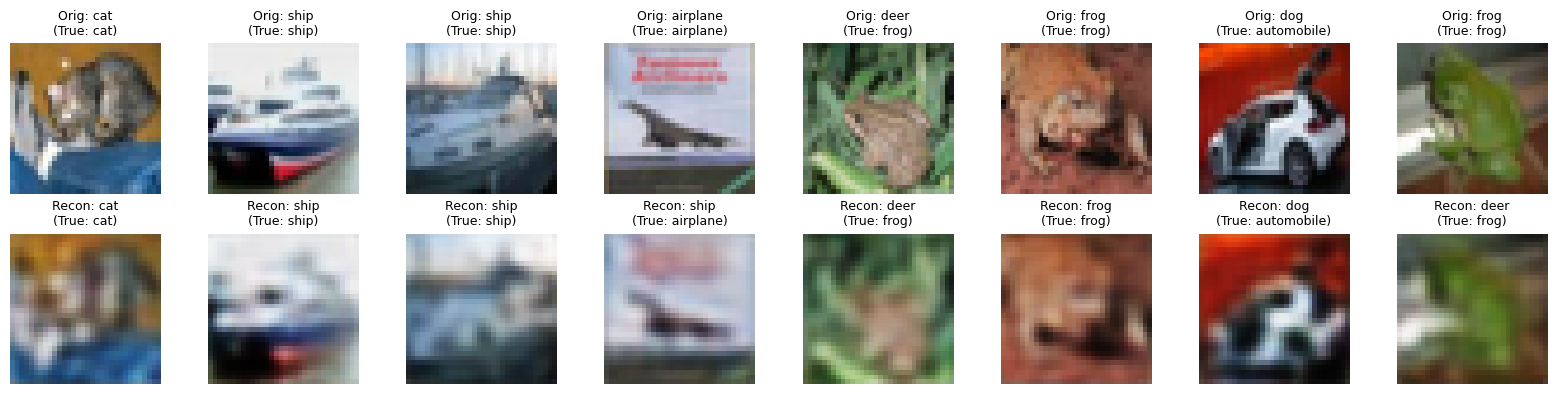

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# ---------------------------------------------------------
# 5.1 Build an Encoder model (to get the compressed latent)
# ---------------------------------------------------------
# If your Step 3 variables `input_img` and `encoded` are still defined:
# (Recommended path — simply run this)
try:
    encoder = models.Model(inputs=input_img, outputs=encoded)
    print("Encoder built from Step 3 tensors.")
except NameError:
    # Fallback (less robust): pick the layer where your 'encoded' lives.
    # For the Step 3 architecture: [Input, Conv, Pool, Conv, Pool, ...]
    # The second MaxPooling2D is typically at index 4 (may vary if you changed layers).
    # You can inspect: autoencoder.summary()
    encoder = models.Model(inputs=autoencoder.input, outputs=autoencoder.layers[4].output)
    print("Encoder built from autoencoder layers (fallback). If this fails, re-run Step 3 cell and use the first path.")

# ---------------------------------------------------------
# 5.2 Helper: Compute PSNR & SSIM across a batch
# ---------------------------------------------------------
def batch_quality_metrics(original, reconstructed):
    """
    original, reconstructed: float32 arrays in [0,1], shape (N, H, W, C)
    returns: mean_psnr, mean_ssim
    """
    psnrs, ssims = [], []
    for i in range(original.shape[0]):
        o = original[i]
        r = reconstructed[i]
        # SSIM API changed in newer skimage. Try channel_axis first, fallback to multichannel.
        try:
            s = ssim(o, r, channel_axis=2, data_range=1.0)
        except TypeError:
            s = ssim(o, r, multichannel=True, data_range=1.0)
        p = psnr(o, r, data_range=1.0)
        ssims.append(s); psnrs.append(p)
    return float(np.mean(psnrs)), float(np.mean(ssims))

# ---------------------------------------------------------
# 5.3 Reconstruct (decode) a test batch & compute compression ratio
# ---------------------------------------------------------
N = 1000  # evaluate on a subset for speed; increase if you like
x_batch = x_test[:N]

# Reconstruct with autoencoder
recon_batch = autoencoder.predict(x_batch, batch_size=128, verbose=0)

# Peek at the latent (compressed) shape using the encoder
latent_batch = encoder.predict(x_batch[:1], verbose=0)  # just one sample to get shape
orig_size = np.prod(x_batch.shape[1:])         # 32*32*3 = 3072
latent_size = np.prod(latent_batch.shape[1:])  # e.g., 8*8*16 = 1024
compression_ratio = orig_size / latent_size
print(f"Estimated compression ratio (input dims / latent dims): {orig_size} / {latent_size} = {compression_ratio:.2f}x")

# ---------------------------------------------------------
# 5.4 Image quality after compression
# ---------------------------------------------------------
mean_psnr, mean_ssim = batch_quality_metrics(x_batch, recon_batch)
print(f"Mean PSNR over {N} images: {mean_psnr:.2f} dB")
print(f"Mean SSIM over {N} images: {mean_ssim:.4f}")

# ---------------------------------------------------------
# 5.5 Classification: Original vs Reconstructed
# ---------------------------------------------------------
# On originals
orig_probs = classifier.predict(x_batch, batch_size=128, verbose=0)
orig_preds = np.argmax(orig_probs, axis=1)
# On reconstructions
recon_probs = classifier.predict(recon_batch, batch_size=128, verbose=0)
recon_preds = np.argmax(recon_probs, axis=1)

y_true = y_test[:N].flatten()
orig_acc = np.mean(orig_preds == y_true)
recon_acc = np.mean(recon_preds == y_true)
print(f"Classifier accuracy on ORIGINALS   : {orig_acc*100:.2f}%")
print(f"Classifier accuracy on RECONSTRUCTS: {recon_acc*100:.2f}%")

# ---------------------------------------------------------
# 5.6 Visual demo: Original vs Reconstructed with predicted labels
# ---------------------------------------------------------
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

k = 8  # show first 8 examples
plt.figure(figsize=(16, 4))
for i in range(k):
    # Original
    ax = plt.subplot(2, k, i+1)
    plt.imshow(x_batch[i])
    true_label = class_names[y_true[i]]
    pred_label = class_names[orig_preds[i]]
    plt.title(f"Orig: {pred_label}\n(True: {true_label})", fontsize=9)
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, k, i+1+k)
    plt.imshow(recon_batch[i])
    pred_label_r = class_names[recon_preds[i]]
    plt.title(f"Recon: {pred_label_r}\n(True: {true_label})", fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()